<a href="https://colab.research.google.com/github/chunming1022/Computer-Graphics/blob/main/%E5%A4%9A%E8%BE%B9%E5%BD%A2%E6%89%AB%E6%8F%8F%E8%BD%AC%E6%8D%A2%E7%AE%97%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

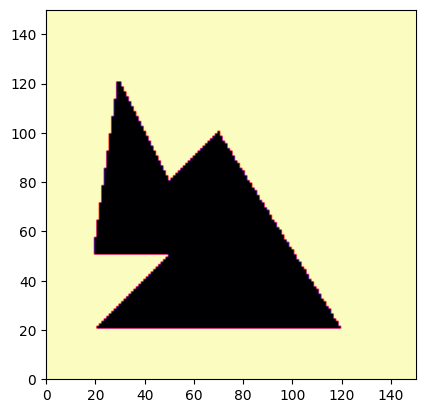

In [ ]:
'''
多边形扫描转换算法
class SingleLinkList:用类代替链表
PoliFill(image, polygon, color):扫描转换

'''


import numpy as np
import matplotlib.pyplot as plt

class Node:
    # 定义节点

    def __init__(self, data):
        self._data = data
        self._next = None

    def get_data(self):
        return self._data

    def get_next(self):
        return self._next

    def set_data(self, ddata):
        self._data = ddata

    def set_next(self, nnext):
        self._next = nnext

class SingleLinkList:
    # 定义链表

    def __init__(self):
        #初始化链表为空
        self._head = None
        self._size = 0

    def get_head(self):
        #获取链表头
        return self._head

    def is_empty(self):
        #判断链表是否为空
        return self._head is None

    def append(self, data):
        #在链表尾部追加一个节点
        temp = Node(data)
        if self._head is None:
            self._head = temp
        else:
            node = self._head
            while node.get_next() is not None:
                node = node.get_next()
            node.set_next(temp)
        self._size += 1

    def remove(self, data):
        # 在链表尾部删除一个节点
        node = self._head
        prev = None
        while node is not None:
            if node.get_data() == data:
                if not prev:
                    # 父节点为None
                    self._head = node.get_next()
                else:
                    prev.set_next(node.get_next())
                break
            else:
                prev = node
                node = node.get_next()
        self._size -= 1


def PoliFill(image, polygon, color):
    l = len(polygon)
    Ymax=0
    Ymin=np.shape(image)[1]
    (width, height) = np.shape(image)
    #求最大最小边
    for [x, y] in enumerate(polygon):
        if y[1] < Ymin:
            Ymin=y[1]
        if y[1] > Ymax:
            Ymax=y[1]

    #初始化并建立NET表
    NET = []
    for i in range(height):
        NET.append(None)


    for i in range(Ymin, Ymax + 1):
        for j in range(0, l):
            if polygon[j][1]==i:
                #左边顶点y是否大于y0
                if(polygon[(j-1+l)%l][1])>polygon[j][1]:
                    [x1,y1]=polygon[(j-1+l)%l]
                    [x0,y0]=polygon[j]
                    delta_x=(x1-x0)/(y1-y0)
                    NET[i] = SingleLinkList()
                    NET[i].append([x0, delta_x, y1])

                # 右边顶点y是否大于y0
                if (polygon[(j+1+l)%l][1])>polygon[j][1]:
                    [x1, y1] = polygon[(j + 1 + l) % l]
                    [x0, y0] = polygon[j]
                    delta_x = (x1 - x0) / (y1 - y0)
                    if(NET[i] is not None):
                        NET[i].append([x0, delta_x, y1])
                    else:
                        NET[i] = SingleLinkList()
                        NET[i].append([x0, delta_x, y1])


    #建立活性边表
    AET = SingleLinkList()
    for y in range(Ymin , Ymax+1):
        # 更新 start_x
        if not AET.is_empty():
            node = AET.get_head()
            while True:
                [start_x,delta_x,ymax] = node.get_data()
                start_x += delta_x
                node.set_data([start_x,delta_x,ymax])
                node = node.get_next()
                if node is None:
                    break

        # 填充
        if not AET.is_empty():
            node = AET.get_head()
            x_list = []
            # 获取所有交点的x坐标
            while True:
                [start_x,_,_] = node.get_data()
                x_list.append(start_x)
                node = node.get_next()
                if node is None:
                    break

            # 排序
            x_list.sort()
            # 两两配对填充
            for i in range(0,len(x_list),2):
                x1 = x_list[i]
                x2 = x_list[i+1]
                for pixel in range(int(x1),int(x2)+1):
                    image[y][pixel] = color

        if not AET.is_empty():
            # 删除非活性边
            node = AET.get_head()
            while True:
                [start_x,delta_x,ymax] = node.get_data()
                if ymax == y:
                    AET.remove([start_x,delta_x,ymax])
                node = node.get_next()
                if node is None:
                    break

        # 添加活性边
        if NET[y] is not None:
            node = NET[y].get_head()
            while True:
                AET.append(node.get_data())
                node = node.get_next()
                if node is None:
                    break


if __name__ == '__main__':
    image = np.ones([150, 150])

    plt.xlim(0,150)
    plt.ylim(0,150)
    polygon = [
        [20, 20],
        [120, 20],
        [70, 100],
        [50, 80],
        [30, 120],
        [20, 50],
        [50, 50]
     ]
    PoliFill(image, polygon,False)
    plt.imshow(image, plt.cm.magma)
    plt.show()
